In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data=pd.read_csv('Data/0_CIC-IDS-2017.csv')

In [4]:
train_data.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Day
0,640,7,4,440,358,220,0,62.857143,107.349008,179,...,0.0,0.0,0,0,0.0,0.0,0,0,0,tues
1,900,9,4,600,2944,300,0,66.666667,132.287566,1472,...,0.0,0.0,0,0,0.0,0.0,0,0,0,tues
2,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,...,0.0,0.0,0,0,0.0,0.0,0,0,0,tues
3,511,7,4,452,370,226,0,64.571429,110.276708,185,...,0.0,0.0,0,0,0.0,0.0,0,0,0,tues
4,773,9,4,612,2944,306,0,68.000000,134.933317,1472,...,0.0,0.0,0,0,0.0,0.0,0,0,0,tues


In [5]:
# remove attribute 'difficulty_level'
train_data.drop(['Day'],axis=1,inplace=True)
train_data.shape

(820969, 78)

In [7]:
train_data.columns

Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SY

In [8]:
# number of attack labels 
train_data[' Label'].value_counts()

0    684768
1    136201
Name:  Label, dtype: int64

In [9]:
train_data = train_data[0:50000]

In [10]:
# distribution of attack classes
train_data[' Label'].value_counts()

0    44806
1     5194
Name:  Label, dtype: int64

In [11]:
data = train_data.copy()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 78 columns):
 Flow Duration                  50000 non-null int64
 Total Fwd Packets              50000 non-null int64
 Total Backward Packets         50000 non-null int64
Total Length of Fwd Packets     50000 non-null int64
 Total Length of Bwd Packets    50000 non-null int64
 Fwd Packet Length Max          50000 non-null int64
 Fwd Packet Length Min          50000 non-null int64
 Fwd Packet Length Mean         50000 non-null float64
 Fwd Packet Length Std          50000 non-null float64
Bwd Packet Length Max           50000 non-null int64
 Bwd Packet Length Min          50000 non-null int64
 Bwd Packet Length Mean         50000 non-null float64
 Bwd Packet Length Std          50000 non-null float64
Flow Bytes/s                    50000 non-null float64
 Flow Packets/s                 50000 non-null float64
 Flow IAT Mean                  50000 non-null float64
 Flow IAT Std                

In [13]:
X = data.drop([" Label"],axis =1)
y = data[" Label"]

# CFS

In [14]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [15]:
selector = SelectPercentile(mutual_info_classif, percentile=30)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(50000, 23)

In [16]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

[' Flow Duration',
 'Total Length of Fwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Fwd IAT Max',
 ' Fwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Fwd Header Length.1',
 ' Subflow Fwd Bytes',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward']

In [18]:
df = data[[' Flow Duration',
             'Total Length of Fwd Packets',
             ' Fwd Packet Length Max',
             ' Fwd Packet Length Mean',
             ' Fwd Packet Length Std',
             'Flow Bytes/s',
             ' Flow Packets/s',
             ' Flow IAT Std',
             ' Flow IAT Max',
             ' Fwd IAT Max',
             ' Fwd Header Length',
             'Fwd Packets/s',
             ' Bwd Packets/s',
             ' Max Packet Length',
             ' Packet Length Mean',
             ' Packet Length Std',
             ' Packet Length Variance',
             ' Average Packet Size',
             ' Avg Fwd Segment Size',
             ' Fwd Header Length.1',
             ' Subflow Fwd Bytes',
             'Init_Win_bytes_forward',
             ' Init_Win_bytes_backward',
             ' Label']]
df.to_csv('cic2017_proc.csv')

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000, 23), (40000,), (10000, 23), (10000,))

In [20]:
ML_Model = []
accuracy = []
f1score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))    
    f1score.append(round(d, 3))

In [21]:
ML_Model1 = []
accuracy1 = []
f1score1 = []
recall1 = []
precision1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    precision1.append(round(b, 3))
    recall1.append(round(c, 3))    
    f1score1.append(round(d, 3))

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(random_state=10)

# fit the model 
rf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [24]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = tree.predict(X_test)


dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [26]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

# ExtraTree

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

# instantiate the model 
et = ExtraTreesClassifier(random_state=10)

# fit the model 
et.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = et.predict(X_test)

et_acc = accuracy_score(y_pred, y_test)
et_prec = precision_score(y_pred, y_test,average='weighted')
et_rec = recall_score(y_pred, y_test,average='weighted')
et_f1 = f1_score(y_pred, y_test,average='weighted')

In [28]:
storeResults('ExtraTree',et_acc,et_prec,et_rec,et_f1)

# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
nb = GaussianNB()

# fit the model 
nb.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')

In [30]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1)

# SVM

In [31]:
from sklearn.svm import SVC

# instantiate the model 
svm = SVC(probability=True)

# fit the model 
svm.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test,average='weighted')
svc_rec = recall_score(y_pred, y_test,average='weighted')
svc_f1 = f1_score(y_pred, y_test,average='weighted')

In [32]:
storeResults('SVC',svc_acc,svc_prec,svc_rec,svc_f1)

# Voting Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[250],
    "max_depth":[200]
    
}

from sklearn.model_selection import GridSearchCV
forest = GridSearchCV(rfc,parameters,cv=10)

clf2 = DecisionTreeClassifier(random_state=1000)

eclf1 = VotingClassifier(estimators=[('rf-parameter', forest), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [65]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [35]:
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', forest),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [66]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [67]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [68]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,1.000,1.000,1.000,1.000
1,Decision Tree,1.000,1.000,1.000,1.000
2,ExtraTree,1.000,1.000,1.000,1.000
3,Naive Bayes,0.503,0.772,0.503,0.419
4,SVC,0.901,1.000,0.901,0.948
5,Voting Classifier,1.000,1.000,1.000,1.000
6,Stacking Classifier,1.000,1.000,1.000,1.000


# Modelling

In [69]:
import joblib
#filename = 'model.sav'
joblib.dump(eclf1, 'model_2017.sav')

['model_2017.sav']

# PCA 

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
 
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

# PCA RF

In [40]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf1 = RandomForestClassifier(random_state=10)

# fit the model 
rf1.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = rf1.predict(x_test)

rf1_acc = accuracy_score(y_pred, y_test)
rf1_prec = precision_score(y_pred, y_test,average='weighted')
rf1_rec = recall_score(y_pred, y_test,average='weighted')
rf1_f1 = f1_score(y_pred, y_test,average='weighted')

In [41]:
storeResults1('PCA Random Forest',rf1_acc,rf1_prec,rf1_rec,rf1_f1)

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree1 = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree1.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = tree1.predict(x_test)


dt1_acc = accuracy_score(y_pred, y_test)
dt1_prec = precision_score(y_pred, y_test,average='weighted')
dt1_rec = recall_score(y_pred, y_test,average='weighted')
dt1_f1 = f1_score(y_pred, y_test,average='weighted')

In [43]:
storeResults1('PCA Decision Tree',dt1_acc,dt1_prec,dt1_rec,dt1_f1)

# Extra Tree

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

# instantiate the model 
et = ExtraTreesClassifier(random_state=10)

# fit the model 
et.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = et.predict(x_test)

et1_acc = accuracy_score(y_pred, y_test)
et1_prec = precision_score(y_pred, y_test,average='weighted')
et1_rec = recall_score(y_pred, y_test,average='weighted')
et1_f1 = f1_score(y_pred, y_test,average='weighted')

In [45]:
storeResults1('PCA ExtraTree',et1_acc,et1_prec,et1_rec,et1_f1)

# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
nb = GaussianNB()

# fit the model 
nb.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = nb.predict(x_test)

nb1_acc = accuracy_score(y_pred, y_test)
nb1_prec = precision_score(y_pred, y_test,average='weighted')
nb1_rec = recall_score(y_pred, y_test,average='weighted')
nb1_f1 = f1_score(y_pred, y_test,average='weighted')

In [47]:
storeResults1('PCA Naive Bayes',nb1_acc,nb1_prec,nb1_rec,nb1_f1)

# PCA SVM

In [48]:
from sklearn.svm import SVC

# instantiate the model 
svm = SVC(probability=True)

# fit the model 
svm.fit(x_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm.predict(x_test)

svc1_acc = accuracy_score(y_pred, y_test)
svc1_prec = precision_score(y_pred, y_test,average='weighted')
svc1_rec = recall_score(y_pred, y_test,average='weighted')
svc1_f1 = f1_score(y_pred, y_test,average='weighted')

In [49]:
storeResults1('PCA SVM',svc1_acc,svc1_prec,svc1_rec,svc1_f1)

# Voting Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[250],
    "max_depth":[200]
    
}

from sklearn.model_selection import GridSearchCV
forest = GridSearchCV(rfc,parameters,cv=10)

clf2 = DecisionTreeClassifier(random_state=1000)

eclf2 = VotingClassifier(estimators=[('rf-parameter', forest), ('dt', clf2)], voting='soft')
eclf2.fit(x_train, y_train)
y_pred = eclf2.predict(x_test)

vot1_acc = accuracy_score(y_pred, y_test)
vot1_prec = precision_score(y_pred, y_test,average='weighted')
vot1_rec = recall_score(y_pred, y_test,average='weighted')
vot1_f1 = f1_score(y_pred, y_test,average='weighted')

In [70]:
storeResults1('PCA Voting Classifier',vot1_acc,vot1_prec,vot1_rec,vot1_f1)

# Stacking Classifier

In [51]:
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', forest),('mlp', MLPClassifier(random_state=1, max_iter=30))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_train)

stac1_acc = accuracy_score(y_pred, y_train)
stac1_prec = precision_score(y_pred, y_train,average='weighted')
stac1_rec = recall_score(y_pred, y_train,average='weighted')
stac1_f1 = f1_score(y_pred, y_train,average='weighted')

In [71]:
storeResults1('PCA Stacking Classifier',stac1_acc,stac1_prec,stac1_rec,stac1_f1)

# Comparison

In [72]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                        'Precision': precision1,
                        'Recall'   : recall1,
                        'F1-Score': f1score1
                      })

In [73]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,PCA Random Forest,1.000,1.000,1.000,1.000
1,PCA Decision Tree,0.998,0.998,0.998,0.998
2,PCA ExtraTree,1.000,1.000,1.000,1.000
3,PCA Naive Bayes,0.494,0.773,0.494,0.410
4,PCA SVM,0.901,1.000,0.901,0.948
5,PCA Voting Classifier,0.999,0.999,0.999,0.999
6,PCA Stacking Classifier,1.000,1.000,1.000,1.000


# Graph

# Original

In [74]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# ACcuracy

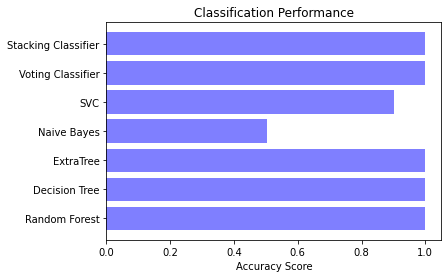

In [75]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

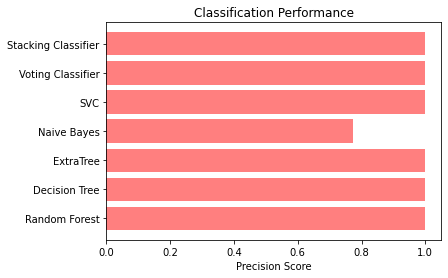

In [76]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

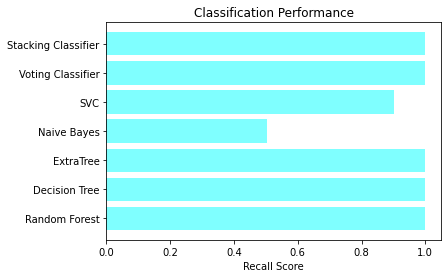

In [77]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

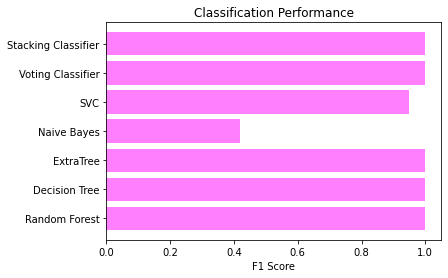

In [78]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# PCA

In [79]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

# Accuracy

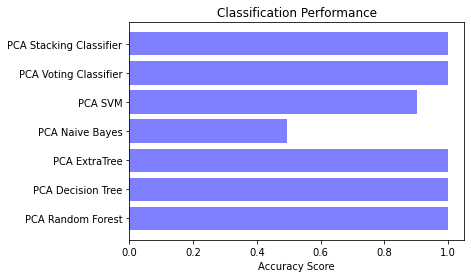

In [80]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

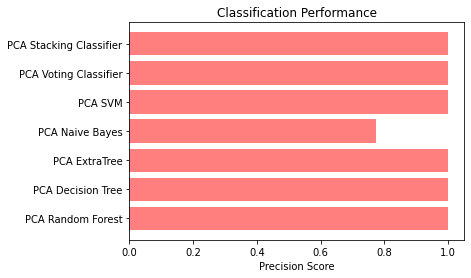

In [81]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

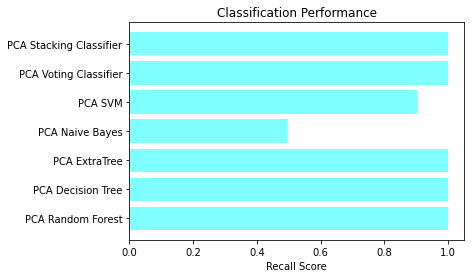

In [82]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

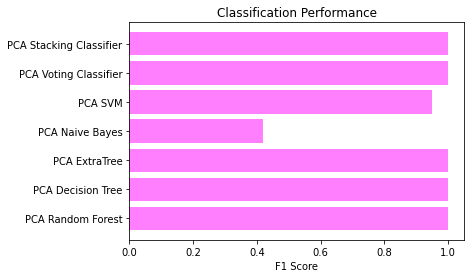

In [83]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()